In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import pickle, importlib
import argparse
import subprocess
import sys
import lime
import lime.lime_tabular
import shap
%matplotlib inline

/data1/wuguojia/software/miniconda/envs/shaplime_stm/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [50]:
#LIME
command = [
    "python", "/home/wuguojia/biocode/mhc_benchmark/MHCXAI.py",
    "--input_list", "/data1/wuguojia/data/mhc_benchmark/attentionbase/testdata_raw/HLA-A*01:01_10.csv",
    "--index", "0",
    "--predictor", "stmhcpan",
    "--xai", "LIME",
    "--mode", "None",  # 根据需要设置
    "--trainf_path", "/data1/wuguojia/data/mhc_benchmark/attentionbase/traindata_raw/HLA-A*01:01_10.csv",
    "--dest", "/data1/wuguojia/data/mhc_benchmark/attentionbase/result/"
]

result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)
print("LIME done")

LIME done


In [3]:
#SHAP
command = [
    "python", "/home/wuguojia/biocode/mhc_benchmark/MHCXAI.py",
    "--input_list", "/data1/wuguojia/data/mhc_benchmark/attentionbase/testdata_raw/HLA-A*01:01_10.csv",
    "--index", "0",
    "--predictor", "stmhcpan",
    "--xai", "SHAP",
    "--mode", "None",  # 根据需要设置
    "--trainf_path", "/data1/wuguojia/data/mhc_benchmark/attentionbase/traindata_raw/HLA-A*01:01_10.pkl",
    "--dest", "/data1/wuguojia/data/mhc_benchmark/attentionbase/result/"
]

result = subprocess.run(command, stdout=subprocess.PIPE, stderr=subprocess.PIPE, universal_newlines=True)
print("SHAP done")

SHAP done


Text(0.5, 1.0, 'SHAP STMHCpan')

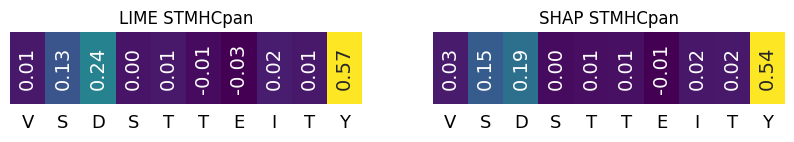

In [51]:
# Plot
#1
fig,ax = plt.subplots(1,2,figsize=(5*2,1.25*0.75))
peptide = 'VSDSTTEITY'
result_path = '/data1/wuguojia/data/mhc_benchmark/attentionbase/result/'
values = np.load(f'{result_path}LIME_VSDSTTEITY_HLA-A*01:01_stmhcpan_None.npy')[1:(1+len(peptide))]
pos_importance_df = pd.DataFrame(values.reshape(-1, len(values)),columns = [aa_ for aa_ in peptide])
b = sns.heatmap(pos_importance_df, annot=True, fmt=".2f", cmap='viridis', 
            annot_kws={'rotation': 90,'fontsize':14}, cbar=False,ax=ax[0])

b.tick_params(left=False,bottom=False)
b.set_yticklabels('')
b.set_xticklabels(b.get_xticklabels(), size=13)
b.set_title("LIME STMHCpan")
#2
values = np.load(f'{result_path}SHAP_VSDSTTEITY_HLA-A*01:01_stmhcpan_None.npy')
pos_importance_df = pd.DataFrame(values.reshape(-1, len(values)),columns = [aa_ for aa_ in peptide])
b = sns.heatmap(pos_importance_df, annot=True, fmt=".2f", cmap='viridis', 
            annot_kws={'rotation': 90,'fontsize':14}, cbar=False,ax=ax[1])

b.tick_params(left=False,bottom=False)
b.set_yticklabels('')
b.set_xticklabels(b.get_xticklabels(), size=13)
b.set_title("SHAP STMHCpan")